In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
red_path='./drive/MyDrive/ml/lab3/ex3red.dat'
green_path='./drive/MyDrive/ml/lab3/ex3green.dat'
blue_path='./drive/MyDrive/ml/lab3/ex3blue.dat'

In [ ]:
green_data=[]
blue_data=[]
red_data=[]
red_x=[]
red_y=[]
green_x=[]
green_y=[]
blue_x=[]
blue_y=[]
with open(green_path,'r')as f:
  for line in f:
    now=line.replace('\n','')
    now=now.split(' ')
    data=[]
    for i in now:
      data.append(float(i))
    green_x.append(data[0])
    green_y.append(data[1])
    green_data.append(data)
with open(red_path,'r')as f:
  for line in f:
    now=line.replace('\n','')
    now=now.split(' ')
    data=[]
    for i in now:
      data.append(float(i))
    red_x.append(data[0])
    red_y.append(data[1])
    red_data.append(data)
with open(blue_path,'r')as f:
  for line in f:
    now=line.replace('\n','')
    now=now.split(' ')
    data=[]
    for i in now:
      data.append(float(i))
    blue_x.append(data[0])
    blue_y.append(data[1])
    blue_data.append(data)
print(green_data)
print(blue_data)
print(red_data)

[[4.95, 8.63], [5.53, 7.79], [4.57, 8.65], [4.16, 9.47], [5.78, 8.42], [5.78, 7.42], [4.18, 8.27], [4.28, 8.02], [4.68, 7.42], [4.58, 8.16], [5.78, 8.42], [5.78, 9.42], [5.78, 7.42], [5.78, 8.42]]
[[2.58, 4.46], [2.16, 6.22], [1.27, 4.23], [1.58, 4.46], [1.16, 5.7], [1.24, 3.52], [1.1, 3.91], [1.78, 6.41], [1.9, 3.22], [1.66, 5.5], [2.2, 5.2], [1.89, 4.0], [2.37, 3.62], [2.3, 2.94]]
[[2.95, 6.63], [2.53, 7.79], [3.57, 5.65], [3.16, 5.47], [2.78, 6.42], [2.78, 7.42], [3.18, 8.27], [3.28, 6.42], [3.68, 7.42], [3.58, 8.16], [2.78, 8.42], [2.78, 6.42], [2.78, 7.42], [2.78, 8.42]]


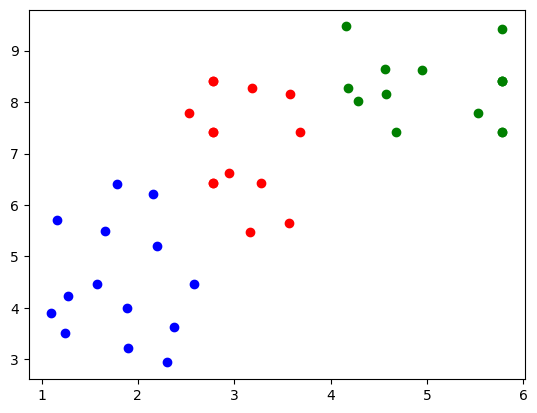

In [ ]:
plt.scatter(green_x,green_y,c='green')
plt.scatter(blue_x,blue_y,c='blue')
plt.scatter(red_x,red_y,c='red')
plt.show()

In [ ]:
def two_class(class_one,class_two):
  average_one=[0,0];
  average_two=[0,0];
  sw=np.array([[0.,0.],[0.,0.]])
  for i in range(len(class_one)):
    average_one[0]+=class_one[i][0]
    average_one[1]+=class_one[i][1]
  for i in range(len(class_two)):
    average_two[0]+=class_two[i][0]
    average_two[1]+=class_two[i][1]
  average_one[0]/=len(class_one)
  average_one[1]/=len(class_one)
  average_two[0]/=len(class_two)
  average_two[1]/=len(class_two)
  u1=np.array(average_one)
  u2=np.array(average_two)
  u1=u1.reshape(1,2)
  u2=u2.reshape(1,2)
  sb=np.transpose(u1-u2)*(u1-u2)
  for i in range(len(class_one)):
    linshi=np.array(class_one[i])
    linshi=linshi.reshape(1,2)
    sw=sw+np.transpose(linshi-u1)*(linshi-u1)
  for i in range(len(class_two)):
    linshi=np.array(class_two[i])
    linshi=linshi.reshape(1,2)
    sw=sw+np.transpose(linshi-u2)*(linshi-u2)
  end=np.linalg.inv(sw)*sb
  eigenvalues,eigenvectors =np.linalg.eig(end)
  max_index = np.argmax(eigenvalues)
  axis = eigenvectors[:, max_index]
  axis=axis.reshape((1,2))
  return axis

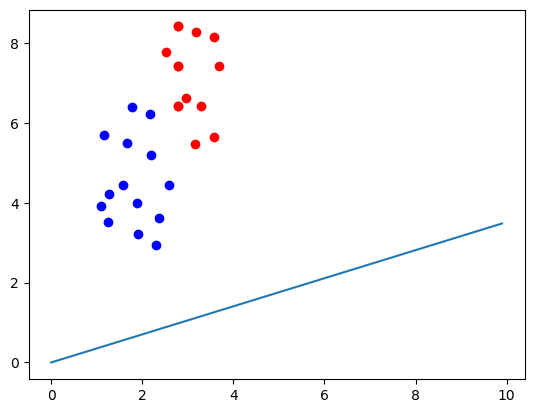

In [ ]:
ans=two_class(red_data,blue_data)
now_x=[]
now_y=[]
for i in np.arange(0,10,0.1):
  now_x.append(i)
  now_y.append(ans[0][1]/ans[0][0]*i)
plt.scatter(blue_x,blue_y,c='blue')
plt.scatter(red_x,red_y,c='red')
plt.plot(now_x,now_y)
plt.show()

In [ ]:
def many_class(class_list,sum):
  average=[]
  average_sum=[0. for j in range(len(class_list[0][0]))]
  sw=np.zeros((len(class_list[0][0]),len(class_list[0][0])))
  sb=np.zeros((len(class_list[0][0]),len(class_list[0][0])))
  for i in class_list:
    average_now=[0. for j in range(len(class_list[0][0]))]
    for j in range(len(i)):
      for k in range(len(i[0])):
        average_now[k]+=i[j][k]
        average_sum[k]+=i[j][k]
    for j in range(len(average_now)):
      average_now[j]/=len(i)
    average.append(average_now)
  for i in range(len(average_sum)):
    average_sum[i]/=sum
  for i in range(len(class_list)):
    for j in range(len(class_list[i])):
      linshi=np.array(class_list[i][j])
      linshi=linshi.reshape(1,len(class_list[0][0]))
      u=np.array(average[i])
      u=u.reshape(1,len(class_list[0][0]))
      sw=sw+np.transpose(linshi-u)*(linshi-u)
  for i in range(len(average)):
    linshi=np.array(average[i])
    linshi=linshi.reshape(1,len(class_list[0][0]))
    u=np.array(average_sum)
    u=u.reshape(1,len(class_list[0][0]))
    sb=sb+len(class_list[i])*(np.transpose(linshi-u)*(linshi-u))
  end=np.linalg.inv(sw)*sb
  eigenvalues,eigenvectors =np.linalg.eig(end)
  max_index = np.argmax(eigenvalues)
  axis = eigenvectors[:, max_index]
  axis=axis.reshape((1,len(class_list[0][0])))
  return axis

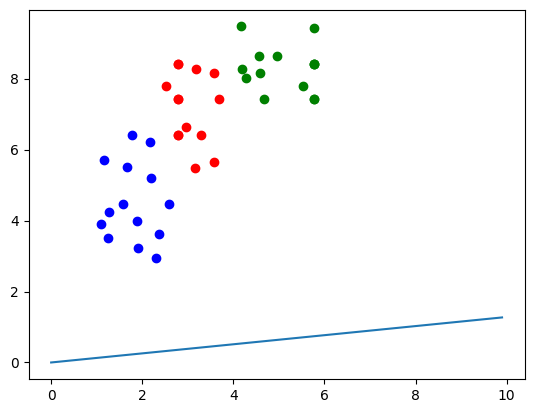

In [ ]:
sum=len(blue_data)+len(green_data)+len(red_data)
sum_data=[]
sum_data.append(blue_data)
sum_data.append(green_data)
sum_data.append(red_data)
ans=many_class(sum_data,sum)
now_x=[]
now_y=[]
for i in np.arange(0,10,0.1):
  now_x.append(i)
  now_y.append(ans[0][1]/ans[0][0]*i)
plt.scatter(blue_x,blue_y,c='blue')
plt.scatter(red_x,red_y,c='red')
plt.scatter(green_x,green_y,c='green')
plt.plot(now_x,now_y)
plt.show()